# Projection Effect Model

If we assume an additive $\Sigma$ projection profile term:
$$
\Sigma_o = \Sigma_t + \Sigma_p
$$

But the question then is: how the projected component looks like? $\Sigma_p$

## Optical Selection Bias

The optical selection can gives us a hint to constraint the functional form of the projected component. From the previous we can write:
$$
bias = \Sigma_o / \Sigma_t = 1+\Sigma_p / \Sigma_t
$$

Then, using Park et al. 2022 functional form we have:
$$
bias(R)= \begin{cases}b_0\left(R / R_0\right) & \text { for } R \leq R_0 \\ b_0+c \ln \left(R / R_0\right) & \text { for } R>R_0\end{cases}
$$

Putting everything together:

$$
\Sigma_p = \Sigma_t \times (bias -1)
$$

We have basically, a NFW multiplied by a radial linear and a log-linear radial depedence.

## Projection from Percolation
The optical selection bias has a feature around the percolation radius. This selection effect might stem from additional halos excluded by the redMaPPer selection. 

To model the projection we assume a NFW profile for the projection term. In addtion is an off-axis mass density profile. Then, we can model as mis-centered NFW at the percolation radius. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context('talk')

In [3]:
## true component
import cluster_toolkit as ct
omega_m = 0.3 
Mt = 1e14
c = 4.

R = np.logspace(np.log10(0.1),np.log10(10.),100)
st = ct.deltasigma.Sigma_nfw_at_R(R, Mt, c, omega_m)


In [4]:
# Park et al. 2021 pars
def calculate_bias(R, R_0, Pi_0, c):
    conditions = [R <= R_0, R > R_0]
    formulas = [lambda R: 1+ Pi_0 * (R / R_0), lambda R: 1+Pi_0 + c * np.log(R / R_0)]
    return np.piecewise(R, conditions, formulas)

r0 = 2.
b0 = 0.18
c = -0.08

bias = calculate_bias(R, r0, b0, c)

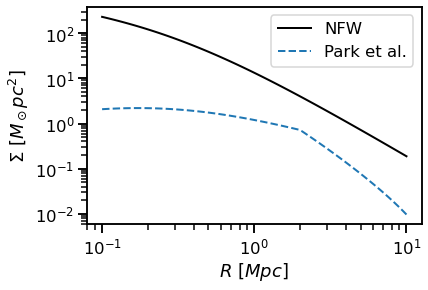

In [5]:
plt.loglog()
plt.plot(R, st, 'k', lw=2, label='NFW')
plt.plot(R, st*(bias-1), 'tab:blue', ls='--', lw=2, label='Park et al.')
plt.ylabel(r'$\Sigma \, \, [M_\odot pc^2]$')
plt.xlabel(r'$R \, \, [Mpc]$')
plt.legend()

## Mis-centered?

Would be the Park et al. functional form a mis-centered NFW ?

In [6]:
#Calculate Rp and Sigma here, where Sigma is centered
Rmis = 1.15 #Mpc/h; typical value
Msub = 0.78e13
ssub = ct.deltasigma.Sigma_nfw_at_R(R, Msub, c, omega_m)
Sigma_mis_single = ct.miscentering.Sigma_mis_at_R(R, R, ssub, Msub, c, omega_m, Rmis)
Sigma_mis_single

In [23]:
# help(ct.miscentering.Sigma_mis_at_R)

In [49]:
Sigma_mis_single = np.array([0.99772822, 0.99833728, 0.99900659, 0.99974218, 1.00055074,
       1.00143964, 1.00241703, 1.00349189, 1.0046742 , 1.00597498,
       1.00740646, 1.0089822 , 1.01071724, 1.0126283 , 1.01473401,
       1.0170551 , 1.01961473, 1.02243876, 1.02555612, 1.02899931,
       1.03280486, 1.0370139 , 1.04167288, 1.04683443, 1.05255826,
       1.05891244, 1.06597485, 1.07383478, 1.08259521, 1.09237539,
       1.10331402, 1.11557351, 1.12934493, 1.14485481, 1.16237352,
       1.18222638, 1.20480838, 1.23060388, 1.26021314, 1.29438964,
       1.33409206, 1.38055929, 1.43542143, 1.50086741, 1.57990749,
       1.67679902, 1.79776751, 1.95227681, 2.15556513, 2.4335259 ,
       2.83446226, 3.45964526, 4.56348437, 4.45525852, 3.14719866,
       2.3806434 , 1.87892223, 1.52632563, 1.26595589, 1.0665705 ,
       0.90958799, 0.78326457, 0.67981392, 0.59386972, 0.52161309,
       0.46025224, 0.40769891, 0.36235965, 0.32299755, 0.28863773,
       0.25850136, 0.23195881, 0.20849554, 0.18768696, 0.16917964,
       0.15267709, 0.13792868, 0.12472129, 0.11287247, 0.10222529,
       0.09264401, 0.0840107 , 0.0762225 , 0.06918932, 0.06283197,
       0.05708065, 0.05187362, 0.04715613, 0.04287953, 0.03900044,
       0.03548017, 0.03228408, 0.02938114, 0.02674348, 0.0243462 ,
       0.02216617, 0.02018535, 0.01500919, 0.01138702, 0.00845309])

Text(0.5, 1.0, '$R_{mis}=1.15\\, Mpc$, $M_{sub,200}=7.8 x 10^{12} M_{\\odot}$')

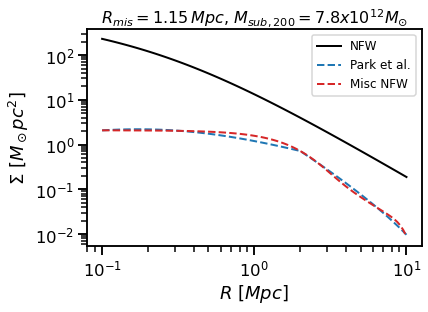

In [53]:
plt.loglog()
plt.plot(R, st, 'k', lw=2, label='NFW')
# plt.plot(R, st+st*(bias-1), 'k--', lw=2, label='Sum')
plt.plot(R, st*(bias-1), 'tab:blue', ls='--', lw=2, label='Park et al.')
# plt.plot(R, 1.0*Sigma_mis_single, 'tab:red', ls='--', lw=2, label='Misc NFW')
plt.plot(R, 1.0*Sigma_mis2, 'tab:red', ls='--', lw=2, label='Misc NFW')
plt.ylabel(r'$\Sigma \, \, [M_\odot pc^2]$')
plt.xlabel(r'$R \, \, [Mpc]$')
plt.legend(fontsize=12)
plt.title('$R_{mis}=1.15\, Mpc$, $M_{sub,200}=7.8 x 10^{12} M_{\odot}$',fontsize=16)

In [17]:
st*(bias-1)

array([2.07482824, 2.09383627, 2.11142566, 2.12753169, 2.14209266,
       2.15505033, 2.16635036, 2.17594267, 2.18378193, 2.18982783,
       2.19404555, 2.19640598, 2.19688609, 2.19546914, 2.1921449 ,
       2.18690982, 2.17976714, 2.17072695, 2.1598062 , 2.14702867,
       2.13242488, 2.11603189, 2.09789315, 2.07805823, 2.05658249,
       2.03352676, 2.00895696, 1.98294365, 1.95556159, 1.92688924,
       1.89700828, 1.8660031 , 1.83396023, 1.80096787, 1.7671153 ,
       1.73249245, 1.69718929, 1.66129543, 1.62489961, 1.58808928,
       1.55095017, 1.51356595, 1.47601785, 1.43838434, 1.40074092,
       1.36315983, 1.32570984, 1.28845615, 1.25146021, 1.21477963,
       1.17846815, 1.14257559, 1.10714783, 1.07222686, 1.03785085,
       1.00405415, 0.97086746, 0.93831787, 0.90642903, 0.87522126,
       0.8447117 , 0.81491445, 0.78584074, 0.75749909, 0.72989547,
       0.67524712, 0.60761814, 0.54632131, 0.49080797, 0.44057213,
       0.39514777, 0.35410609, 0.31705309, 0.28362706, 0.25349

In [29]:
Sigma_mis2 = np.array([2.07856995, 2.07799345, 2.07734906, 2.07664349, 2.07586977,
       2.07502177, 2.07408845, 2.07306714, 2.07194665, 2.07071743,
       2.06936955, 2.06788925, 2.06626932, 2.06449192, 2.0625422 ,
       2.06040637, 2.05806246, 2.05549847, 2.05268435, 2.04960241,
       2.04622628, 2.04252312, 2.03847481, 2.03403902, 2.02905256,
       2.02386992, 2.01805484, 2.01168165, 2.00474211, 1.9971409 ,
       1.98935453, 1.97976901, 1.96986807, 1.95906789, 1.94728977,
       1.93445646, 1.92047946, 1.9052723 , 1.88875521, 1.87078029,
       1.8512922 , 1.83016562, 1.80729622, 1.78256642, 1.75586404,
       1.72708704, 1.69611662, 1.66285382, 1.62720168, 1.58907212,
       1.54840019, 1.50513302, 1.45924067, 1.41072285, 1.35961089,
       1.30597568, 1.24993054, 1.19161934, 1.13131079, 1.06922141,
       1.00569737, 0.94112518, 0.87594625, 0.81064553, 0.74577703,
       0.68188299, 0.61954551, 0.55934157, 0.50181338, 0.44746023,
       0.39671081, 0.34990078, 0.30725494, 0.26888885, 0.23479745,
       0.20483749, 0.17878272, 0.15631827, 0.13707172, 0.12064327,
       0.10662934, 0.0946488 , 0.08435821, 0.07546183, 0.0677144 ,
       0.06091782, 0.0549161 , 0.04958571, 0.04482998, 0.0405687 ,
       0.0367318 , 0.03326573, 0.03010162, 0.02715866, 0.02434896,
       0.02155488, 0.01864554, 0.01552335, 0.01218687, 0.00879833])

In [ ]:
#Calculate Rp and Sigma here, where Sigma is centered
Rmis = 1.15 #Mpc/h; typical value
Msub = 0.78e13
ssub = ct.deltasigma.Sigma_nfw_at_R(R, Msub, c, omega_m)
Sigma_mis_single = ct.miscentering.Sigma_mis_single_at_R(R, R, ssub, Msub, c, omega_m, Rmis)
Sigma_mis_single